<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

# Part I - Replicate Assignment Coding Tasks

In [0]:
# Import Statements
import pandas as pd
import numpy as np

### Read a CSV file and supply column names

In [0]:
# Read a CSV file and supply column names
col_hdrs = ['name', 'landmass', 'zone', 'area', 'population', 'language', 
                  'religion', 'bars', 'stripes', 'colours', 'red', 'green', 
                  'blue', 'gold', 'white', 'black', 'orange', 'mainhue', 
                  'circles', 'crosses', 'saltires', 'quarters', 'sunstars', 
                  'crescent', 'triangle', 'icon', 'animate', 'text', 'topleft', 
                  'botright']

url_flags = 'https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data'

df_flags = pd.read_csv(url_flags, header=None, names=col_hdrs)

print(f'Shape: {df_flags.shape}')
df_flags.head()

Shape: (194, 30)


,name,landmass,zone,area,population,language,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,mainhue,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red


### Read a CSV file - columns specified as a header row

In [0]:
# Read a CSV file - columns specified as a header row
url_bike = 'https://opendata.arcgis.com/datasets/e8c2b7ef54fb43d9a2ed1b0b75d0a14d_4.csv'

df_bike = pd.read_csv(url_bike)
df_bike.sample(5)

,OBJECTID,LENGTH,NAME,STATUS,MAINTENANC,Shape_Length,MILES,ROUTEID
29,30,2570.978,Kingman Island Trail,Open,,783.635657,0.000000,NaN
28,29,274.330,S. Capitol Bridge Crossing,Open,DDOT,83.616011,0.000000,NaN
61,62,0.369,Pennsylvania Ave SE,Open,,593.698912,0.000000,NaN
63,64,2387.538,11th St. Bridge Crossing,Open,DDOT,727.722830,0.452185,NaN
45,46,3570.964,,Open,,1088.432221,0.000000,NaN


### Read a sample file already resident in Colab

In [0]:
# Read a sample file already resident in Colab
src_file = 'sample_data/anscombe.json'

df_anscombe = pd.read_json(src_file)
df_anscombe.head()

,Series,X,Y
0,I,10,8.04
1,I,8,6.95
2,I,13,7.58
3,I,9,8.81
4,I,11,8.33


### Navigate the Colab virtual server

In [0]:
# Navigate the Colab virtual server
from pathlib import Path
import os

# Grab the home and parent directories
pth_home = Path.cwd()
print(f'Home Directory:\n{pth_home}\n')
print(f'Parent Directory:\n{pth_home.parent}\n')

# Construct the data directory
pth_data = Path.joinpath(pth_home, 'sample_data')
print(f'Child (Data) Directory:\n{pth_data}\n')

# Generate a list of files in the data directory
pth_data_files = os.listdir(pth_data)
print("Data Directory Files:")
for fle in sorted(pth_data_files):
  print(fle)

# Read a virtual os file into Colab
pth_data_example = Path.joinpath(pth_data, sorted(pth_data_files)[2])

df_cali_test = pd.read_csv(pth_data_example)
print(f'\nSample of CA Housting Test Dataset:\n{df_cali_test.sample()}')

Home Directory:
/content

Parent Directory:
/

Child (Data) Directory:
/content/sample_data

Data Directory Files:
README.md
anscombe.json
california_housing_test.csv
california_housing_train.csv
mnist_test.csv
mnist_train_small.csv

Sample of CA Housting Test Dataset:
      longitude  latitude  ...  median_income  median_house_value
2355     -119.2     34.15  ...         1.4773            160800.0

[1 rows x 9 columns]


# Part II - Replicate Assignment Coding Tasks

### Get LendingClub Data

In [1]:
# Get LendingClub Data
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

# Unzip the compressed file
!unzip LoanStats_2018Q4.csv.zip

# Display the head of the downloaded file
!head LoanStats_2018Q4.csv

--2019-11-02 00:23:28--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [          <=>       ]  21.66M   411KB/s    in 56s     

2019-11-02 00:24:26 (394 KB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22709125]

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    
Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","

In [0]:
# Display the tail of the downloaded file
!tail LoanStats_2018Q4.csv

### Load LendingClub Data

In [2]:
# Read in the LendingClub data from the the virtual server
df_lndclub = pd.read_csv('LoanStats_2018Q4.csv', skiprows=1, skipfooter=2, engine='python')

df_lndclub.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,35000,35000,35000.0,36 months,14.47%,1204.23,C,C2,Staff Physician,8 years,MORTGAGE,360000.0,Verified,Dec-2018,Fully Paid,n,NaN,NaN,credit_card,Credit card refinancing,336xx,FL,19.90,0,Apr-1995,1,NaN,NaN,24,0,57259,43.2%,51,w,0.00,0.00,38187.046837,38187.05,...,30.8,0,0,1222051,169286,124600,258401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,5000,5000,5000.0,36 months,22.35%,191.86,D,D5,Director of Sales,10+ years,MORTGAGE,72000.0,Source Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,333xx,FL,20.12,0,Mar-2010,0,NaN,NaN,13,0,11720,47.1%,26,f,0.00,0.00,5615.977674,5615.98,...,50.0,0,0,218686,34418,18200,37786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,10000,10000,10000.0,60 months,23.40%,284.21,E,E1,NaN,< 1 year,RENT,55000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,902xx,CA,13.51,0,Apr-2007,0,44.0,88.0,9,1,11859,53.9%,11,w,9025.41,9025.41,2822.600000,2822.60,...,100.0,1,0,34386,21235,10500,12386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,17100,17100,17100.0,36 months,18.94%,626.30,D,D2,Receptionist,10+ years,RENT,38000.0,Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,150xx,PA,38.09,0,Mar-1998,1,47.0,NaN,14,0,15323,53%,21,w,13271.86,13271.86,6236.010000,6236.01,...,75.0,0,0,70954,43351,16600,41784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,4000,4000,4000.0,36 months,10.72%,130.43,B,B2,Extrusion assistant,10+ years,MORTGAGE,56000.0,Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,301xx,GA,31.03,0,Sep-2006,0,NaN,NaN,7,0,4518,28.6%,11,w,3014.03,3014.03,1291.210000,1291.21,...,0.0,0,0,221310,71375,12300,77865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Dataframe shape and columns
print(f'Dataframe Shape: {df_lndclub.shape}')
print(f'Dataframe Shape: {df_lndclub.columns}')

Dataframe Shape: (128412, 144)
Dataframe Shape: Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term'],
      dtype='object', length=144)


In [0]:
# Configue options so we can see as much of the display data as possible
pd.options.display.max_rows=999
pd.options.display.max_columns=100

# How many cells (by column) have missing values?
df_lndclub.isnull().sum().sort_values(ascending=False)

### Work String Values

In [12]:
# Identify a column that should not be a string (but is)
df_lndclub['int_rate'].dtype # Is an object type

# Grab the first 'int_rate' value
val0_int_rate = df_lndclub.loc[0, 'int_rate']
print(f'int_rate\'s first value is: {val0_int_rate} which has a type of: {type(val0_int_rate)}')

int_rate's first value is:  14.47% which has a type of: <class 'str'>


In [20]:
import re

# Define a function to return a string of numeric values

# get_float returns a float number embedded in a string
def get_float(str):
  tmp = re.sub('[^0-9\.]','', str)
  return float(tmp)

print(f'First Value of int_rate as a number: {get_float(val0_int_rate)}')

First Value of int_rate as a number: 14.47


In [0]:
# Apply the get_float function to the 'int_rate' column data
df_lndclub['int_rate_float'] = df_lndclub['int_rate'].apply(get_float)

# Compare the old and new 'int_rate' columns
df_lndclub[['int_rate', 'int_rate_float']].head()

In [0]:
# Confirm we can do math on the new column
df_lndclub['int_rate_double'] = df_lndclub['int_rate_float']*2
df_lndclub[['int_rate', 'int_rate_float', 'int_rate_double']].sample(8)

### Clean emp_title

In [0]:
# Sample values in the emp_title column
df_lndclub[['emp_title', 'int_rate']].sample(8)

In [0]:
# Sum up the number of unique titles
df_lndclub['emp_title'].value_counts(ascending=False, dropna=False).head()

In [0]:
# How many emp_title null values are there?
df_lndclub['emp_title'].isnull().sum()

In [0]:
# Define a function that can be used to clean up the emp_title data
import numpy as np

def clean_title(title):
  if not isinstance(title, str):
    # title is not a string value - return 'Unknown'
    return 'Unknown'

  tmp = title.strip()

  if len(tmp) == 0:
    # title is an empty - return 'Unknown'
    return 'Unknown'

  return tmp.title()

# Test with some sample values
tst_samples = ['owner', 'Supervisor', ' Project Manager', '', np.NaN]

for item in tst_samples:
  print(clean_title(item))

In [38]:
# Apply the clean_title function to the entire dataframe column
df_lndclub['emp_title_clean'] = df_lndclub['emp_title'].apply(clean_title)

# Compare the old and new 'emp_title' data
df_lndclub[['emp_title', 'emp_title_clean']].sample(10)

# Any missing data in the emp_title_clean column?
df_lndclub['emp_title_clean'].isnull().sum()

0

In [0]:
# Value counts
df_lndclub['emp_title_clean'].value_counts(ascending=False).head()

### Create an emp_title_manager column

In [0]:
# Create a boolean 'emp_title_manager' that indicates if the person holds a 'Manager' role
df_lndclub['emp_title_manager'] = df_lndclub['emp_title_clean'].str.contains('Manager')

# Compare the title and boolean flag columns
df_lndclub[['emp_title_clean', 'emp_title_manager']].sample(10)

In [45]:
# Any missing 'emp_title_manager' flag values?
df_lndclub['emp_title_manager'].isnull().sum()

0

### Work with Dates

In [47]:
# Construct a list of "date" column names
df_lndclub_cols_dates = [col for col in df_lndclub.columns if (col.endswith('_d')) or (col.endswith('_date'))]
print(df_lndclub_cols_dates)

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'debt_settlement_flag_date', 'settlement_date']


In [0]:
# Sample some values in a column and print out its type
for item in df_lndclub[df_lndclub_cols_dates[0]].sample(10):
  print(f'Sample date value: {item} has a type of: {type(item)}')


In [0]:
# Convert the date column's value to a date object
df_lndclub['issue_d_clean'] = pd.to_datetime(df_lndclub['issue_d'], infer_datetime_format=True)

# Compare the date value to the cleaned up date object value
df_lndclub[['issue_d', 'issue_d_clean']].sample(8)

In [0]:
# Create some columns based on dates
df_lndclub['issue_d_year'] = df_lndclub['issue_d_clean'].dt.year
df_lndclub['issue_d_month'] = df_lndclub['issue_d_clean'].dt.month
df_lndclub['issue_d_weekday'] = df_lndclub['issue_d_clean'].dt.weekday

# Compare the date to the derived values
df_lndclub[['issue_d_clean', 'issue_d_year', 'issue_d_month', 'issue_d_weekday']].sample(10)

### Filtering

In [0]:
# Filter on whether the borrower is a manager
cond_is_mgr = df_lndclub['emp_title_manager']

df_lndclub_managers = df_lndclub[cond_is_mgr]

df_lndclub_managers.sample(10)

In [0]:
# Filter on two expressions
cond_is_mgr_owns_home = (df_lndclub['emp_title_manager'] == False) & (df_lndclub['home_ownership'] == 'OWN')

# Apply the condition to the dataframe (non-managers who own their homes)
df_lndclub_nonmanagers = df_lndclub[cond_is_mgr_owns_home]

df_lndclub_nonmanagers.sample(20)

In [62]:
# What's the mean interest rate for managers?
round(df_lndclub_managers['int_rate_float'].mean(), 3)

12.76

In [63]:
# What's the mean interest rate for non-managers?
round(df_lndclub_nonmanagers['int_rate_float'].mean(), 3)

13.196

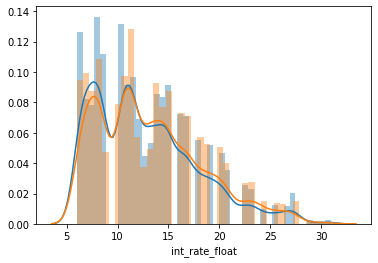

In [64]:
# Compare Visually: Manager & Non-Manager Interest Rates
import seaborn as sns
sns.distplot(df_lndclub_managers['int_rate_float'])
sns.distplot(df_lndclub_nonmanagers['int_rate_float']);

### Additional Assignment Tasks

In [0]:
# Convert the `term` column from string to integer.
for item in df_lndclub['term'].sample(20):
  print(f'term value: {item} has a type of {type(item)}')

In [0]:
# get_int returns a integer number embedded in a string
def get_int(str):
  tmp = re.sub('[^0-9]','', str)
  return int(tmp)

In [0]:
df_lndclub['term_int'] = df_lndclub['term'].apply(get_int)

df_lndclub['term_int'].sample(20)

In [75]:
# Make a column named loan_status_is_great. It should contain the integer 1 if loan_status is "Current" or "Fully Paid." Else it should contain the integer 0.

# has_healthy_loan returns a 1 for a current of paid off loan and 0 for all other values
def has_healthy_loan(str):
  if str == 'Current' or str == 'Fully Paid':
    return 1

  return 0


0

In [0]:
# Create a 'loan_status_is_great' that indicates if the borrower loan is current or paid off (1) or (0) otherwise
df_lndclub['loan_status_is_great'] = df_lndclub['loan_status'].apply(has_healthy_loan)

df_lndclub[['loan_status', 'loan_status_is_great']].sample(20)

In [81]:
# Make last_pymnt_d_month and last_pymnt_d_year columns.

# Convert the date column's value to a date object
df_lndclub['last_pymnt_d_clean'] = pd.to_datetime(df_lndclub['last_pymnt_d'], infer_datetime_format=True)

# Create last payment year and month columns
df_lndclub['last_pymnt_d_year'] = df_lndclub['last_pymnt_d_clean'].dt.year
df_lndclub['last_pymnt_d_month'] = df_lndclub['last_pymnt_d_clean'].dt.month

# Compare the date to the derived values
df_lndclub[['last_pymnt_d_clean', 'last_pymnt_d_year', 'last_pymnt_d_month']].sample(10)

,last_pymnt_d_clean,last_pymnt_d_year,last_pymnt_d_month
71848,2019-10-01,2019.0,10.0
71311,2019-06-01,2019.0,6.0
15865,2019-10-01,2019.0,10.0
41541,2019-10-01,2019.0,10.0
35687,2019-10-01,2019.0,10.0
73821,2019-10-01,2019.0,10.0
74618,2019-08-01,2019.0,8.0
43062,2019-10-01,2019.0,10.0
392,2019-10-01,2019.0,10.0
98584,2019-10-01,2019.0,10.0


# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01